In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)


In [ ]:
# matplotlib 한글 폰트 적용
# 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치 후 런타임 다시시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,437 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [ ]:
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 로딩

In [ ]:
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
#label 0은 비행기, 1은 자동차...
class_names = np.array(['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭'])

# 이미지 확인
- matplotlib을 이용해 N개의 이미지를 확인한다. 
    - 개수는 알아서 선택하세요.

In [ ]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


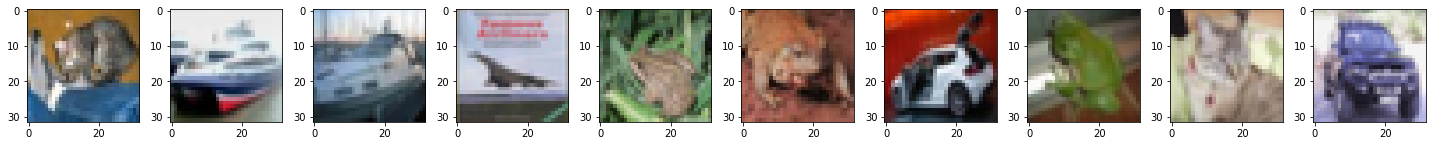

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(test_image[i], cmap='gray')

plt.tight_layout()
plt.show()

# 데이터 전처리
- X: 0 ~ 1 scaling
- y: onehot encoding

In [ ]:
#- X: 0 ~ 1 scaling
X_train_tmp = (train_image/255.0).astype(np.float32)
X_test_tmp = (test_image/255.0).astype(np.float32)

#채널 축 추가할 필요없음
#X_train = X_train_tmp[..., np.newaxis]
#X_test = X_test_tmp[..., np.newaxis]
#print(X_train.shape, X_test.shape)

X_train_tmp.shape, X_test_tmp.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
#!!!!!!!
#- y: onehot encoding
y_train=keras.utils.to_categorical(train_label)
y_test=keras.utils.to_categorical(test_label)

#손실함수에 따라서 이미지는 모두 숫자형으로 되어 있기 때문에 앞에서 encoding 해줘야 할 필요가 있는것임.

# 하이퍼파라미터, 변수 정의

In [ ]:
N_epochs=50
N_batchs=250
Learning_rate=0.001

n_train=train_image.shape[0]
n_test=test_image.shape[0]
n_train, n_test

(50000, 10000)

# Dataset 생성
- train/test set

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tmp, y_train)).shuffle(N_epochs).batch(N_batchs, drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tmp, y_test)).shuffle(N_epochs).batch(N_batchs, drop_remainder=True)
print(train_dataset)
print(test_dataset)

<BatchDataset shapes: ((250, 32, 32, 3), (250, 10)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((250, 32, 32, 3), (250, 10)), types: (tf.float32, tf.float32)>


# 모델 생성 및 컴파일
- CNN 모델을 이용해 10개의 class를 분류하는 모델을 구현

In [ ]:
#모델생성
def create_cifar_model():
  model = keras.Sequential()

  model.add(layers.InputLayer((32,32, 3)))
  model.add(layers.Conv2D(filters=50,
                          kernel_size=(3,3),
                          padding='same',
                          strides=(1,1),
                          activation='relu'
                          ))
  model.add(layers.MaxPool2D(pool_size=(2,2),
                             strides=(2,2),
                             padding='same'
                             ))
  model.add(layers.Conv2D(
      filters=100,
      kernel_size=3,
      padding='same',
      activation='relu'
      ))
  model.add(layers.MaxPool2D(padding='same'))

  model.add(layers.Conv2D(filters=200, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(padding='same'))

  model.add(layers.Flatten())

  model.add(layers.Dense(units=400, activation='relu'))

  model.add(layers.Dense(units=10, activation='softmax'))

  return model

# 학습 및 평가
- callback을 이용해 early stopping, 가장 성능 좋았을때 모델 저장 하세요.
    - 모델은 자신의 google drive에 저장하세요.
- 저장됬던 모델을 loading한 뒤 그 모델도 평가해보세요.

In [ ]:
model = create_cifar_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=Learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 100)       45100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 200)         180200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 200)        0

In [ ]:
model.evaluate(test_dataset)

40/40 [==============================] - 12s 290ms/step - loss: 2.2554 - accuracy: 0.2098


[2.2553648948669434, 0.20980000495910645]

In [ ]:
#저장경로 저장
#from google.colab import drive
#drive.mount('content/drive')

import os 
base_dir = "/content/drive/mydrive/saved_models"

if not os.path.isdir(base_dir): #base_dir이 있는 디렉토리인지?
    os.mkdir(base_dir) #디렉토리가 없으면 만들어라

mnist_weight_dir = os.path.join(base_dir, "mnist_weight") #모델의 weight들을 저장할 디렉토리명
print(mnist_weight_dir)

if not os.path.isdir(mnist_weight_dir):
    os.mkdir(mnist_weight_dir)
    
    #저장할 weight 파일명
weight_file_path = os.path.join(mnist_weight_dir, "mnist_weight_ckpt")

print(weight_file_path)

In [ ]:
#callback 이용
import os 
base_dir = "/content/drive/mydrive/saved_models"

if not os.path.isdir(base_dir): #base_dir이 있는 디렉토리인지?
    os.mkdir(base_dir) #디렉토리가 없으면 만들어라

checkpoint_save_dir = os.path.join(base_dir, 'cifer10_callback')
if not os.path.isdir(checkpoint_save_dir):
  os.mkdir(checkpoint_saved_dir)

checkpoint_save_file = 

#안됨###############3

NameError: ignored

In [ ]:
base_dir = "/content/drive/mydrive/saved_models"
checkpoint_save_dir = os.path.join(base_dir, 'cifer10_callback')
checkpoint_save_dir

checkpoint_save_file = os.path.join(checkpoint_save_dir, 'cifar_ckpt_{epoch:03d}') #세자릿수로 이뤄진 정수형 001

checkpoint_save_file

'/content/drive/mydrive/saved_models/cifer10_callback/mnist_ckpt_{epoch:03d}'

In [ ]:
#모델과 weights 저장
mc_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_file, 
                                              save_best_only=True,
                                              monitor='val_loss',
                                              verbose=1
                                              )

#early stopping
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            verbose=1)

In [ ]:
model = create_cifar_model()
model.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [ ]:
hist = model.fit(train_dataset,
                 epochs=N_epochs,
                 validation_data = test_dataset,
                 callbacks=[mc_callback, es_callback])

Epoch 1/50
199/200 [============================>.] - ETA: 0s - loss: 1.5557 - accuracy: 0.4348
Epoch 00001: val_loss improved from inf to 1.22203, saving model to /content/drive/mydrive/saved_models/cifer10_callback/mnist_ckpt_001
INFO:tensorflow:Assets written to: /content/drive/mydrive/saved_models/cifer10_callback/mnist_ckpt_001/assets
200/200 [==============================] - 18s 46ms/step - loss: 1.5541 - accuracy: 0.4357 - val_loss: 1.2220 - val_accuracy: 0.5636
Epoch 2/50
199/200 [============================>.] - ETA: 0s - loss: 1.0881 - accuracy: 0.6173
Epoch 00002: val_loss improved from 1.22203 to 1.02521, saving model to /content/drive/mydrive/saved_models/cifer10_callback/mnist_ckpt_002
INFO:tensorflow:Assets written to: /content/drive/mydrive/saved_models/cifer10_callback/mnist_ckpt_002/assets
200/200 [==============================] - 9s 44ms/step - loss: 1.0876 - accuracy: 0.6176 - val_loss: 1.0252 - val_accuracy: 0.6353
Epoch 3/50
199/200 [===========================

In [ ]:
new_model= keras.models.load_model('/content/drive/mydrive/saved_models/cifer10_callback/cifar_ckpt_006')
new_model.evaluate(test_dataset)

40/40 [==============================] - 1s 16ms/step - loss: 0.7789 - accuracy: 0.7366


[0.7788607478141785, 0.7365999817848206]